# Import Dependencies


In [100]:
import pandas as pd #Importing Pandas for data manipulation
import seaborn as sns #Importing seaborn for visualation
import numpy as np #Importing numpy for array operations
import datetime as dt #Importing datetime for date manipulation
from matplotlib import pyplot as plt #Importing pyplot from matplotlib for visualization
import warnings #Importing warnings to supress warnings in output
warnings.filterwarnings('ignore')

# Load Dataset 

In [101]:
channeldf = pd.read_csv('ChannelData.csv', index_col='Unnamed: 0')

# Working on Channel Data 

Details on columns 
1. Channel_name - Title of Youtube Channel
2. Channel_Created - Date of Channel account created
3. Channel_country - Country where channel was created 
4. Channel_viewcount - Total views accumulated on channnel till '16-Jan-2022'
5. Channel_subcount - Total Subscriber count of channel till '16-Jan-2022'
6. Channel_vidcount - Total number of video uploaded on channel till '16-Jan-2022'

In [102]:
channeldf.head()

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Linus Tech Tips,2008-11-25T00:46:52Z,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,6766534352,15300000,6110
1,UrAvgConsumer,2012-01-01T23:54:16Z,US,UU9fSZHEh6XsRpX-xJc6lT3A,493950324,3220000,1097
2,Mrwhosetheboss,2011-04-20T12:10:24Z,GB,UUMiJRAwDNSNzuYeN2uWa0pA,2955088872,13700000,1518
3,Marques Brownlee,2008-03-21T15:25:54Z,US,UUBJycsmduvYEL83R_U4JriQ,3412523732,16700000,1526
4,Dave2D,2015-01-05T17:24:15Z,CA,UUVYamHliCI9rw1tHR1xbkfw,737859595,3600000,702


In [5]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Channel_name       8 non-null      object
 1   Channel_Created    8 non-null      object
 2   Channel_country    7 non-null      object
 3   Channel_uploads    8 non-null      object
 4   Channel_viewcount  8 non-null      int64 
 5   Channel_subcount   8 non-null      int64 
 6   Channel_vidcount   8 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 512.0+ bytes


Convert Date column from UTC format to MM/DD/YY format 

In [6]:
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])
channeldf['Channel_Created'] = channeldf['Channel_Created'].dt.strftime('%m/%d/%Y')
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])

In [7]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Channel_name       8 non-null      object        
 1   Channel_Created    8 non-null      datetime64[ns]
 2   Channel_country    7 non-null      object        
 3   Channel_uploads    8 non-null      object        
 4   Channel_viewcount  8 non-null      int64         
 5   Channel_subcount   8 non-null      int64         
 6   Channel_vidcount   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 512.0+ bytes


In [8]:
channeldf

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Linus Tech Tips,2008-11-25,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,6766534352,15300000,6110
1,UrAvgConsumer,2012-01-01,US,UU9fSZHEh6XsRpX-xJc6lT3A,493950324,3220000,1097
2,Mrwhosetheboss,2011-04-20,GB,UUMiJRAwDNSNzuYeN2uWa0pA,2955088872,13700000,1518
3,Marques Brownlee,2008-03-21,US,UUBJycsmduvYEL83R_U4JriQ,3412523732,16700000,1526
4,Dave2D,2015-01-05,CA,UUVYamHliCI9rw1tHR1xbkfw,737859595,3600000,702
5,Unbox Therapy,2010-12-21,NaN,UUsTcErHg8oDvUnTzoqsYeNw,4429005372,18200000,2113
6,Austin Evans,2007-08-05,US,UUXGgrKt94gR6lmN4aN3mYTg,1299303013,5370000,1869
7,Technical Guruji,2015-10-19,IN,UUOhHO2ICt0ti9KAh-QHvttQ,3289008084,22900000,4884


#View count comparsion

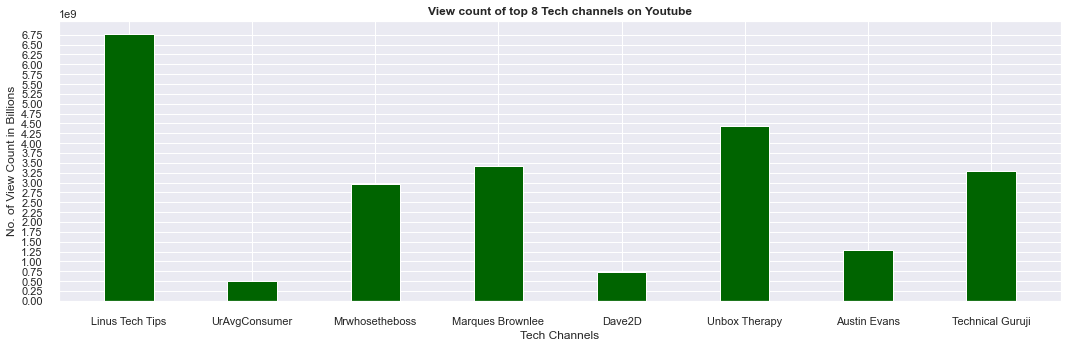

In [103]:
fig, ax = plt.subplots(figsize =(15, 5))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_viewcount'], color ='darkgreen',
        width = 0.4,)
step_value = 250000000
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of View Count in Billions")
plt.title("View count of top 8 Tech channels on Youtube" , fontdict= { 'fontweight' : 'bold'})
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

 We can see that among the other channels 'Linus Tech Tips' has the highest views accumulated with a total views greater than five billion. 

#Subscriber base % compared to each other

In [87]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index1.html","w")
Html_file.write(html_str)
Html_file.close()


In [69]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.integer):
            return int(obj)
        if isinstance(obj, numpy.floating):
            return float(obj)
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
 

In [77]:
import json
from numpyencoder import NumpyEncoder
json01=json.dumps(mpld3.fig_to_dict(fig), cls=NumpyEncoder)

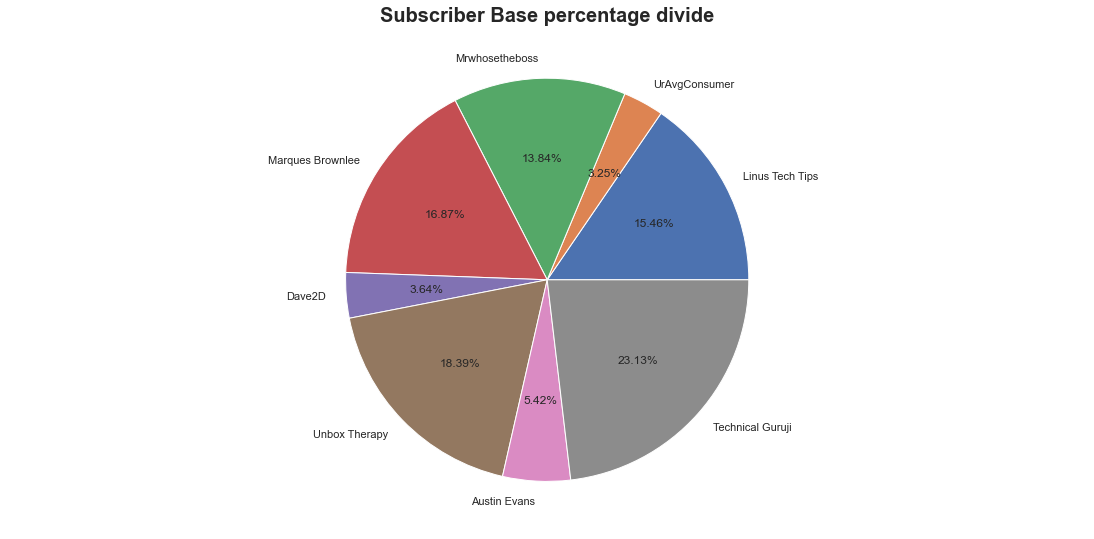

In [88]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(channeldf['Channel_subcount'], labels = channeldf['Channel_name'],autopct='%1.2f%%')
ax.set_title('Subscriber Base percentage divide', fontdict={'fontsize' : 20, 'fontweight':'bold'})
plt.show()

In [89]:
json02=json.dumps(mpld3.fig_to_dict(fig), cls=NumpyEncoder)
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index2.html","w")
Html_file.write(html_str)
Html_file.close()

 With 24.04% "Technical Guruji" channel has the highest subscriber count compared to other channels, followed by "Unbox Therapy" and "Marques Brownlee"

Its intresting to see that even though "Linus Tech Tips" have 34.70% less subscriber than "Technical Guruji" it still has the highest no. of view count followed by "Unbox Therapy" which can be justified seeing a subscriber percentage share of almost 20% compared with others.

#Total number of videos uploaded on channel

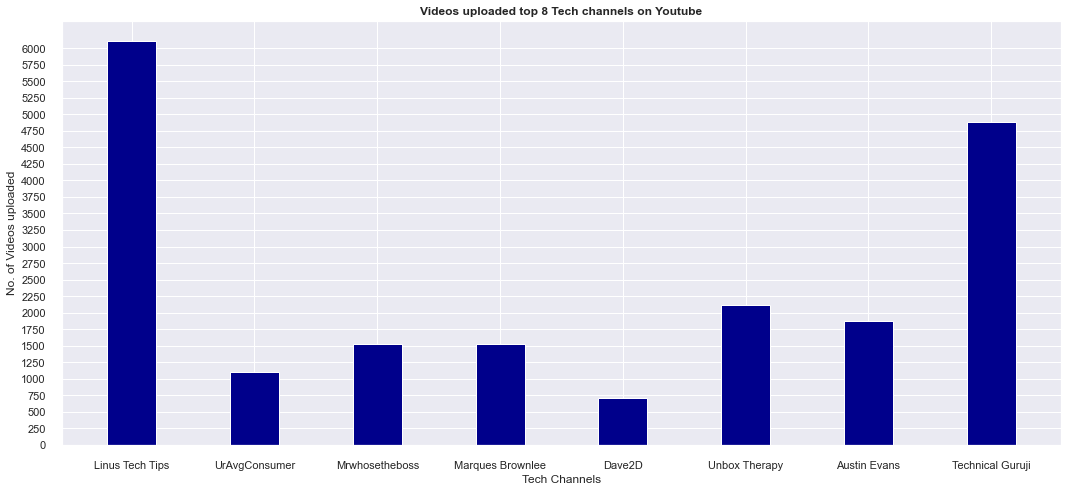

In [90]:
fig, ax = plt.subplots(figsize =(15, 7))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_vidcount'], color ='darkblue',
        width = 0.4,)
step_value = 250
plt.yticks(np.arange(0, max(channeldf['Channel_vidcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of Videos uploaded")
plt.title("Videos uploaded top 8 Tech channels on Youtube" , fontdict= { 'fontweight' : 'bold'})
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

In [91]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index3.html","w")
Html_file.write(html_str)
Html_file.close()


In [81]:
json03=json.dumps(mpld3.fig_to_dict(fig), cls=NumpyEncoder)

"Linus Tech Tips" leads the total number of uploads made followed by "Technical Guruji". 

Does Higher no. of uploads with equally high subscriber count leads to higher view count ? 

#Relationship between channel subscriber count and View count with total video count as hue parameter

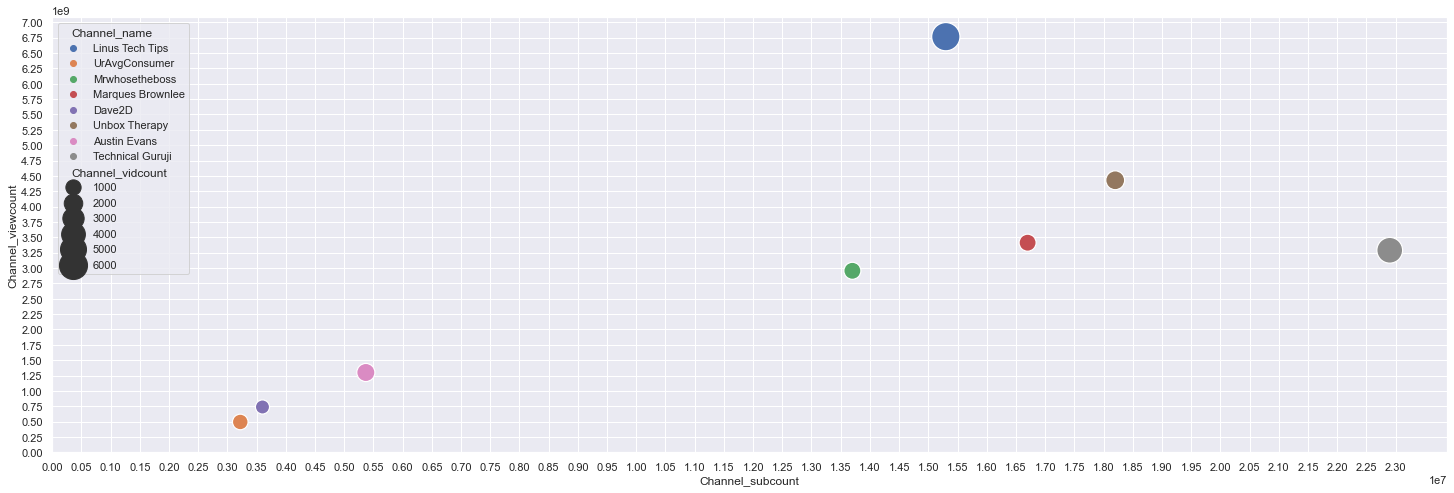

In [92]:
fig, ax = plt.subplots(figsize =(25, 8))
sns.set_style("darkgrid")
sns.scatterplot(data=channeldf, x=channeldf['Channel_subcount'], y=channeldf['Channel_viewcount'], size= channeldf['Channel_vidcount'], hue=channeldf['Channel_name'], alpha=1, sizes=(200,800))
step_value = 500000
step = 250000000
plt.xticks(np.arange(0, max(channeldf['Channel_subcount']) + step_value, step_value))
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']) + step, step))
# show the graph
plt.show()

In [93]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index4.html","w")
Html_file.write(html_str)
Html_file.close()


Scatterplots are useful for interpreting trends in statistical data. The above figure shows a scatterplot for Subscriber count, View count and Upload count as size parameter. We can observe a positive linear relationship between the 3 variables.

indicating a increase in subscriber count has a higher chance of increase in view count, while we can also see "Linus Tech Tips" does not follow the trend with higher than average upload nos. resulting a higher view count for a relatively less subscriber count.

additionally, "Technical Guruji" shows a decline in view count as compared to highest subcriber base.

conclusion - Scatterplots shows a possible associations or relationships between the three variables, but doesn’t mean that a cause-and-effect relationship exists as we have a limited data in culamative format.

#Finding Correlation between Subcriber Count, View Count & Total Video Count

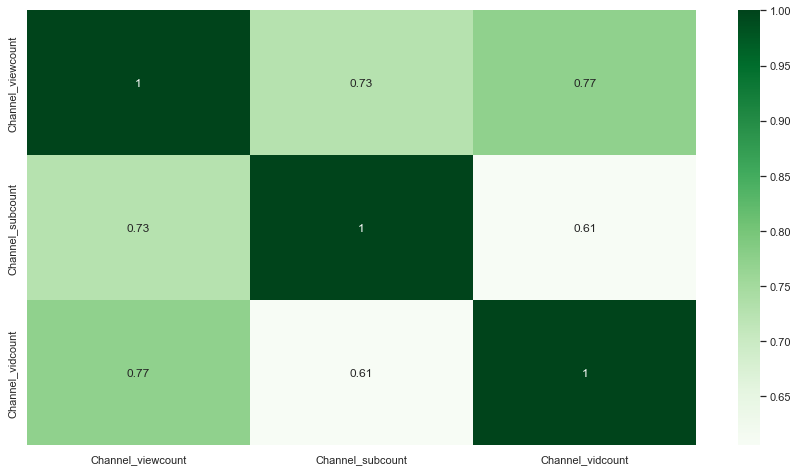

In [94]:

fig, ax = plt.subplots(figsize =(15, 8))
corr_matrix=channeldf.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='Greens', annot=True)
plt.show()

In [95]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index5.html","w")
Html_file.write(html_str)
Html_file.close()


By displaying a heatmap on correlation matrix we can see that Channel View count is more correlated to Channel video upload with 0.78 coefficient. while having 0.76 correlation coefficient for Channel Views and Channel Subscriber count. The data here can be skewed towards video uploads due high number of video uploads made from "Linus Tech Tips"

# Working on Video Details

getting details like video id's, video published date, video description etc to understand more on factors such as upload frequency.

In [14]:
videodf = pd.read_csv('VideoDetails.csv',index_col='Unnamed: 0')


Details on columns:

1. Video_id - Unique video id detail for each video 
2. Video_published_date - Date of video upload 
3. Channel_name - Title of Youtube Channel
4. Video_description - Video description for each video
5. Video_position - Upload sequence of video for each channel ( 0 being latest)


In [15]:
videodf.head()


,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,ambaCzFTyo8,2023-03-15T18:02:45Z,Linus Tech Tips,Thanks to Pulseway for sponsoring this video! ...,0
1,Bc422iIvCcY,2023-03-14T17:12:50Z,Linus Tech Tips,It’s no secret their chairs are great! Check o...,1
2,YznFvx5DFUw,2023-03-13T21:33:10Z,Linus Tech Tips,Visit https://www.squarespace.com/LTT and use ...,2
3,wUVWuH9RDGQ,2023-03-12T17:00:39Z,Linus Tech Tips,What do you get when you put 4 easily distract...,3
4,YGhfy3om9Ok,2023-03-11T18:07:43Z,Linus Tech Tips,Get 69% off any of XSplit’s video tools. Use c...,4


#Type conversion

In [16]:
videodf['Video_published_date'] = pd.to_datetime(videodf['Video_published_date'])

In [17]:
videodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19986 entries, 0 to 19985
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Video_id              19986 non-null  object             
 1   Video_published_date  19986 non-null  datetime64[ns, UTC]
 2   Channel_name          19986 non-null  object             
 3   Video_description     19971 non-null  object             
 4   Video_position        19986 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 936.8+ KB


Updated Datetime type

In [18]:
videodf.head()

,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,ambaCzFTyo8,2023-03-15 18:02:45+00:00,Linus Tech Tips,Thanks to Pulseway for sponsoring this video! ...,0
1,Bc422iIvCcY,2023-03-14 17:12:50+00:00,Linus Tech Tips,It’s no secret their chairs are great! Check o...,1
2,YznFvx5DFUw,2023-03-13 21:33:10+00:00,Linus Tech Tips,Visit https://www.squarespace.com/LTT and use ...,2
3,wUVWuH9RDGQ,2023-03-12 17:00:39+00:00,Linus Tech Tips,What do you get when you put 4 easily distract...,3
4,YGhfy3om9Ok,2023-03-11 18:07:43+00:00,Linus Tech Tips,Get 69% off any of XSplit’s video tools. Use c...,4


#Group by year
Group count of videos uploaded each year for respective Youtube channel

In [19]:
def aggyear(colname):
  plotdata = videodf[videodf['Channel_name'] == colname]
  plotdata['Video_published_date'] = plotdata['Video_published_date'].dt.year
  plotdata = plotdata.groupby('Video_published_date').count()
  plotdata.drop(index=2022, inplace=True)
  return(plotdata.index,plotdata['Video_id'],plotdata)

#Using line graph--subplots to display all channel upload frequency by years

using aggyear function to group each channel data with upload year and counting the no. of uploads made in each year. 

year 2022 is droped from analysis as including it will give an negative slope for year 2022

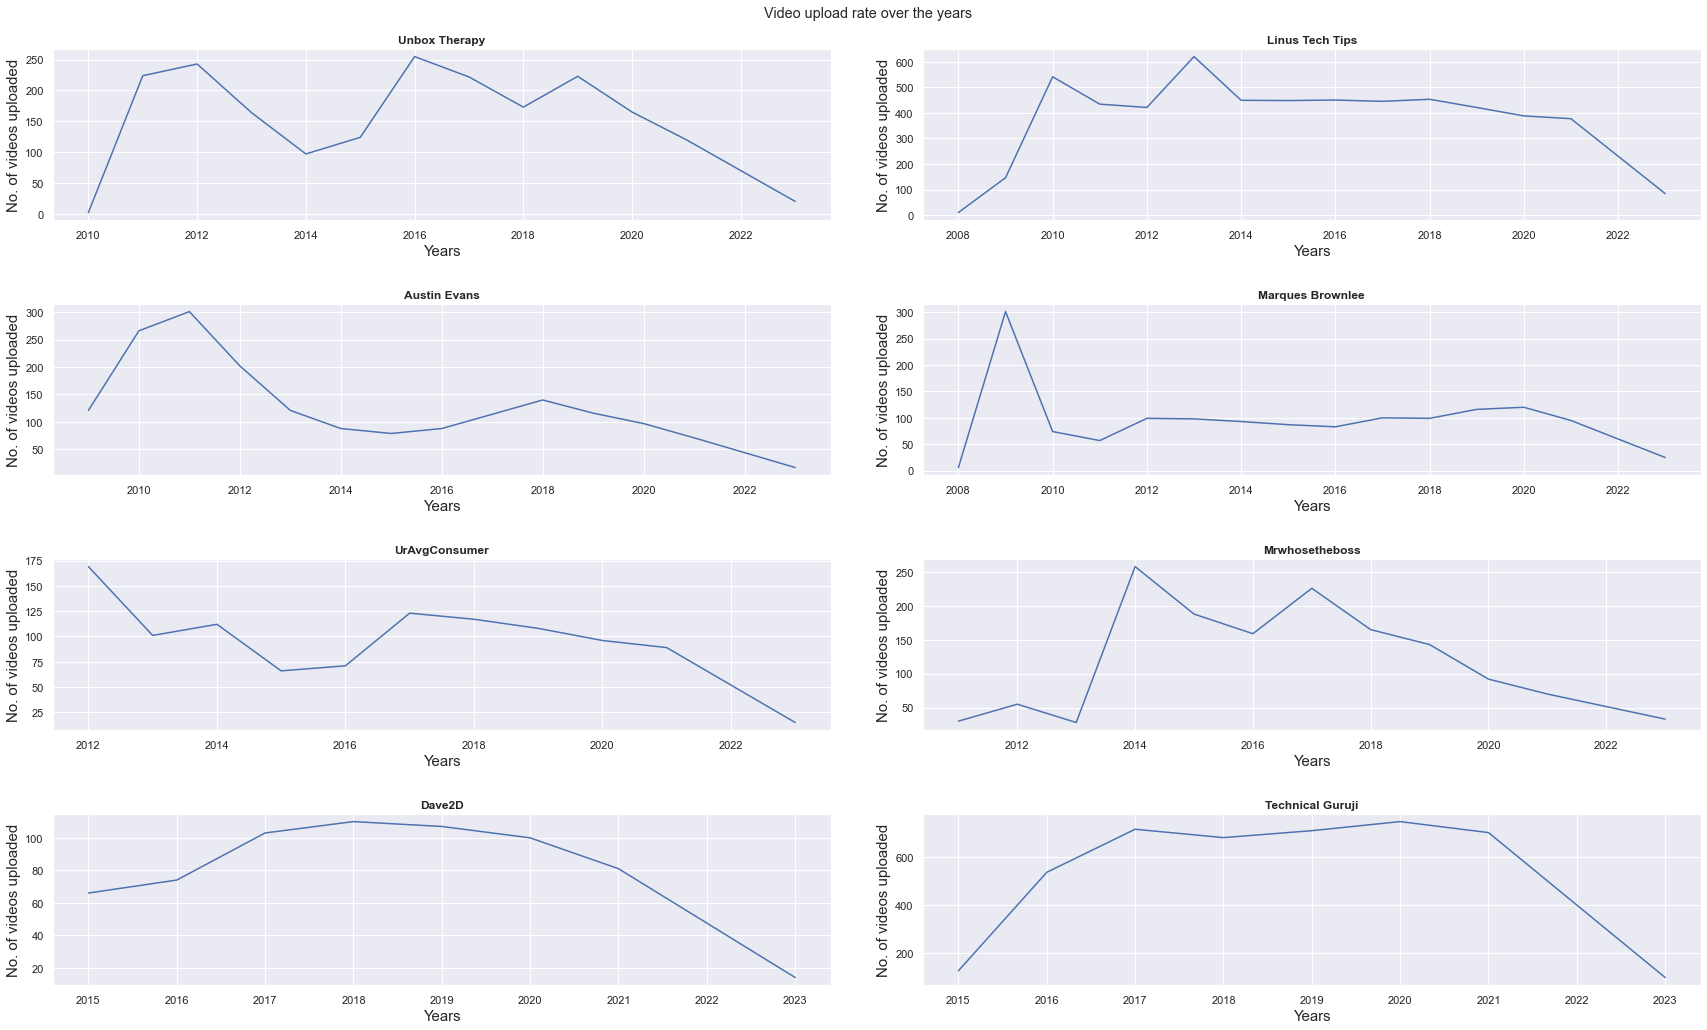

In [96]:
fig, axes = plt.subplots(4, 2, figsize=(25, 15))
sns.set_theme(style="darkgrid")
fig.tight_layout(pad=5.0)
fig.suptitle('Video upload rate over the years', fontdict= { 'fontsize': 20 })


X,Y,plotdata = aggyear('Unbox Therapy')
l = sns.lineplot(ax=axes[0, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[0][0].set_title('Unbox Therapy', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Linus Tech Tips')
l= sns.lineplot(ax=axes[0, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[0][1].set_title('Linus Tech Tips', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Austin Evans')
l= sns.lineplot(ax=axes[1, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[1][0].set_title('Austin Evans', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Marques Brownlee')
l=sns.lineplot(ax=axes[1, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[1][1].set_title('Marques Brownlee', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('UrAvgConsumer')
l=sns.lineplot(ax=axes[2, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[2][0].set_title('UrAvgConsumer', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Mrwhosetheboss')
l=sns.lineplot(ax=axes[2, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[2][1].set_title('Mrwhosetheboss', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Dave2D')
l=sns.lineplot(ax=axes[3, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[3][0].set_title('Dave2D', fontdict = {'fontweight' : 'bold'})


X,Y,plotdata = aggyear('Technical Guruji')
l=sns.lineplot(ax=axes[3, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded', fontdict= { 'fontsize' : 15})
l.set_xlabel('Years', fontdict= { 'fontsize' : 15})
axes[3][1].set_title('Technical Guruji', fontdict = {'fontweight' : 'bold'})
plt.show()

In [97]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index6.html","w")
Html_file.write(html_str)
Html_file.close()


###Analysis on upload frequency
1. "Unbox Therapy" chart follows a trend where in the upload falls and rises for every 2 year of interval with average uploads increasing each passing year. looking at it now we can say 2022 "MIGHT" be the next rise in uploads. 
2. "Linus Tech Tips" maintains a flat constant uploads of nearly 450 videos since year 2014, this helps in understanding the huge uploaded video count and highest view count. 
3. "Austin Evans" shows a rapidly decreasing upload frequency from year 2011 to year 2015, where it can starts to built up from year 2016, overall chart indicates a low performing channel 
4. "Marques Browniee" maintains a constant graph of roughly 100 uploads per year since late 2011. as compared to "Linus Tech Tips" for whom graph stays stable from 2014
5. "UrAvgConsumer" shows a huge fluctuations in upload frequency since the dawn of the channel with no apparanet positive or negative effect on average video uploads
6. "MrWhoseTheboss" follows the similar trend with not so huge fluctuations with graph indicating a overall reduce in average video uploads per year.
7. "Dave2D" upload frequency grows exponential from year 2016 touching maximum uploads in year 2018, followed by a decline in upload frequency uptill year 2021.
8. "Technical Guruji" channel since the first year of channel has an ever increasing graph eventually maintaing the flat line from year 2017 with the highest average uploads of around 700+ videos. 

###Key Take-aways
1. "Technical Guruji" is the **highest uploading channel** with 700+ videos and no downfall since its start.
2. "Marques Browniee" and "Linus Tech Tips" are the two channels maintaing a **flat curve cross the years** with average uploads of 100 and 450 videos respectively.
3. "Dave2D", "MrWhostheBoss" and "Austin Evans" are 3 channels showing a **decline in upload frequency**.
4. "Unbox Therapy" shows **positive growth in channel but with fluctuations**.

#Working with Video Statistics

In [22]:
stats = pd.read_csv('VideoStatistics.csv',index_col='Video_id')
stats.drop(columns='Unnamed: 0', inplace = True)

Details on columns:
1. Video_id - Unique Video ID's for each video
2. Video_Channel_title - Title of Youtube Channel
3. Stats_Comment - Count of Comments on a Video 
4. Stats_Fav - Count of Favorite marked 
5. Stats_Like - Count of Likes on a Video
6. Stats_View - Count of Views on a Video

In [23]:
stats.head()

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
ambaCzFTyo8,Linus Tech Tips,2687.0,0,44929.0,1094121.0
Bc422iIvCcY,Linus Tech Tips,4064.0,0,58985.0,1459641.0
YznFvx5DFUw,Linus Tech Tips,2540.0,0,63145.0,1508343.0
wUVWuH9RDGQ,Linus Tech Tips,7703.0,0,117264.0,1764835.0
YGhfy3om9Ok,Linus Tech Tips,5324.0,0,79088.0,2151766.0


In [24]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19986 entries, ambaCzFTyo8 to JjVP4W3rF5c
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Video_Channel_title  19986 non-null  object 
 1   Stats_Comment        19961 non-null  float64
 2   Stats_Fav            19986 non-null  int64  
 3   Stats_Like           19969 non-null  float64
 4   Stats_view           19974 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 936.8+ KB


Checking for missing data

In [25]:
stats.isnull().sum()

Video_Channel_title     0
Stats_Comment          25
Stats_Fav               0
Stats_Like             17
Stats_view             12
dtype: int64

In [26]:
stats[stats['Stats_Comment'].isnull()]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
DMqtQjYKtZ8,Linus Tech Tips,NaN,0,10709.0,396874.0
lWGGoGblSBc,Linus Tech Tips,NaN,0,1019.0,24597.0
8syPkiANwYk,Marques Brownlee,NaN,0,104572.0,773421.0
TmikWdsrz_U,Marques Brownlee,NaN,0,43715.0,505679.0
R7siKvpvuCM,Marques Brownlee,NaN,0,34301.0,482851.0
TTWJq2MpCx4,Marques Brownlee,NaN,0,14811.0,143874.0
MQ97Kymd6X0,Marques Brownlee,NaN,0,4894.0,71786.0
FFuePFTf9LQ,Marques Brownlee,NaN,0,4710.0,104577.0
GFdzwQw4CxQ,Marques Brownlee,NaN,0,6258.0,202991.0


##Handling Missing Data
using mean to fill in for null data.

In [27]:
#Fill null comments value with mean comment count
stats['Stats_Comment'].fillna(stats['Stats_Comment'].mean(), inplace = True)

#Handling the nulls with 'Likes' and 'View' in similar method
stats['Stats_Like'].fillna(stats['Stats_Like'].mean(), inplace = True)

stats['Stats_view'].fillna(stats['Stats_view'].mean(), inplace = True)



In [28]:
stats.isnull().sum()

Video_Channel_title    0
Stats_Comment          0
Stats_Fav              0
Stats_Like             0
Stats_view             0
dtype: int64

Type conversion

In [29]:
stats['Stats_Comment'] = stats['Stats_Comment'].astype(np.int64)
stats['Stats_Like'] = stats['Stats_Like'].astype(np.int64)
stats['Stats_view'] = stats['Stats_view'].astype(np.int64)

In [30]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19986 entries, ambaCzFTyo8 to JjVP4W3rF5c
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Video_Channel_title  19986 non-null  object
 1   Stats_Comment        19986 non-null  int64 
 2   Stats_Fav            19986 non-null  int64 
 3   Stats_Like           19986 non-null  int64 
 4   Stats_view           19986 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 936.8+ KB


In [31]:
stats

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
ambaCzFTyo8,Linus Tech Tips,2687,0,44929,1094121
Bc422iIvCcY,Linus Tech Tips,4064,0,58985,1459641
YznFvx5DFUw,Linus Tech Tips,2540,0,63145,1508343
wUVWuH9RDGQ,Linus Tech Tips,7703,0,117264,1764835
YGhfy3om9Ok,Linus Tech Tips,5324,0,79088,2151766
...,...,...,...,...,...
jg4fDLm32oM,Technical Guruji,3629,0,44860,1639465
Wyxr3U7OFOw,Technical Guruji,1580,0,17073,488288
oveLR8nIeEk,Technical Guruji,856,0,11804,330535


#Channel Having Most Statistics on a Video

Getting the maximum values in all statistics for each group by using GroupBy Channel Title.

In [32]:
group = stats.groupby(by='Video_Channel_title').max()

In [33]:
group

,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_Channel_title,,,,
Austin Evans,53250,0,406568,25844354
Dave2D,25395,0,349642,31680567
Linus Tech Tips,224591,0,618078,22588958
Marques Brownlee,336759,0,680648,39870154
Mrwhosetheboss,262059,0,3206191,47997820
Technical Guruji,790463,0,2093348,18354537
Unbox Therapy,1660778,0,420105,73721133
UrAvgConsumer,71422,0,158303,8542582


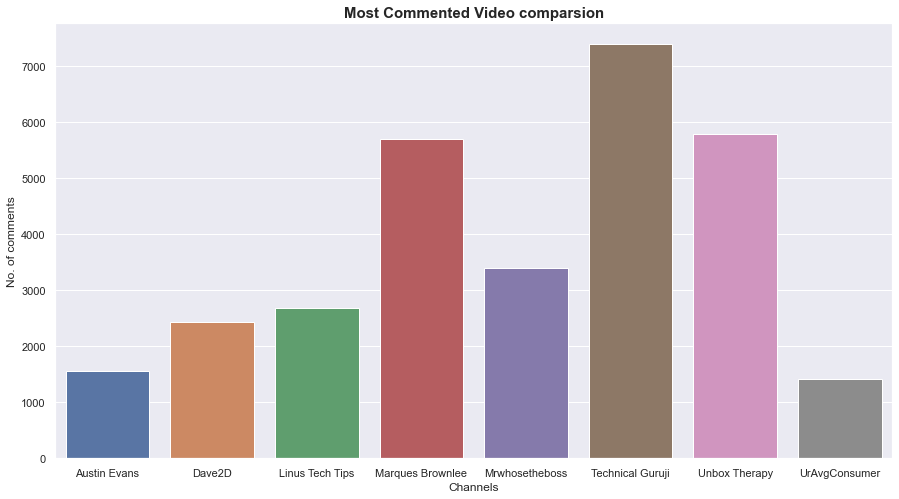

In [104]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_Comment', data=group)
step_value = 75000
# bar.set_yticks(np.arange(60000, 1674945, step_value))
bar.set_title('Most Commented Video comparsion', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Channels')
bar.set_ylabel('No. of comments')
plt.show()

In [105]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index7.html","w")
Html_file.write(html_str)
Html_file.close()


with 16,74,945 comments "Unbox Therapy" has the highest comments on a Video.

In [35]:
stats[stats['Stats_Comment'] == 1674945]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,


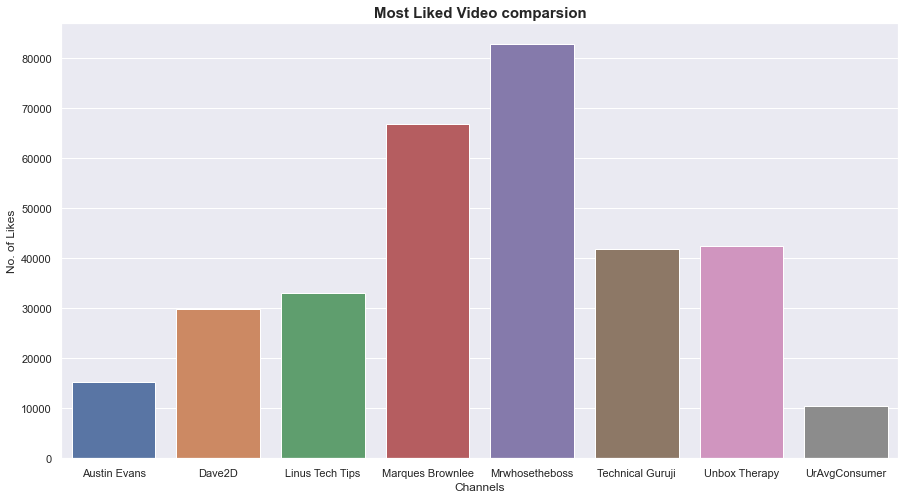

In [108]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_Like', data=group)
step_value = 100000
# bar.set_yticks(np.arange(158120, 2097566, step_value))
bar.set_title('Most Liked Video comparsion', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Channels')
bar.set_ylabel('No. of Likes')
plt.show()

In [109]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index8.html","w")
Html_file.write(html_str)
Html_file.close()


"Mrwhosetheboss" tops the chart with most liked video with a likes count of 20,97,566

In [38]:
stats[stats['Stats_Like'] == 2097566]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
AkuRDBX92LA,Technical Guruji,179481,0,2097566,13166501


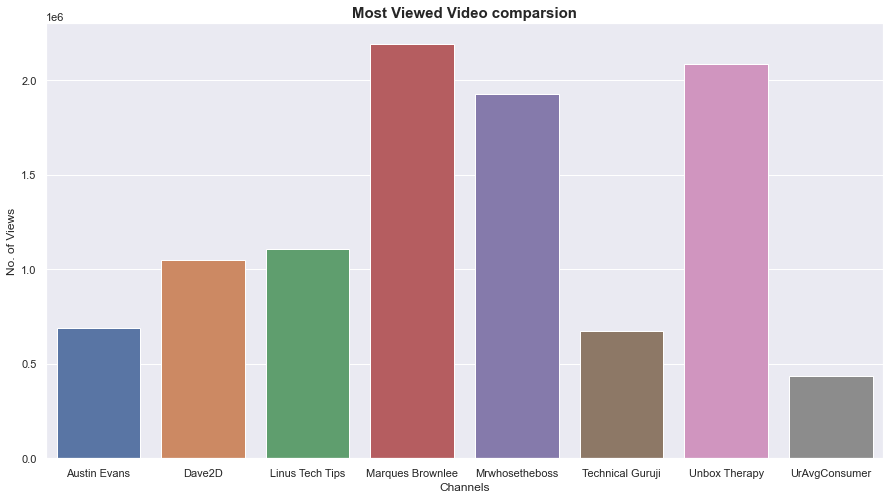

In [110]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_view', data=group)
step_value = 5000000
# bar.set_yticks(np.arange(8513830, 74495719, step_value))
bar.set_title('Most Viewed Video comparsion' , fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Channels')
bar.set_ylabel('No. of Views')
plt.show()

In [111]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index9.html","w")
Html_file.write(html_str)
Html_file.close()


"Unbox Therapy" has the most viewed video of all with a view count of 7,34,95,719

In [36]:
stats[stats['Stats_view'] == 73495719]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
znK652H6yQM,Unbox Therapy,46904,0,348424,73495719


#Ploting 5 point summary of video statistics using boxplot

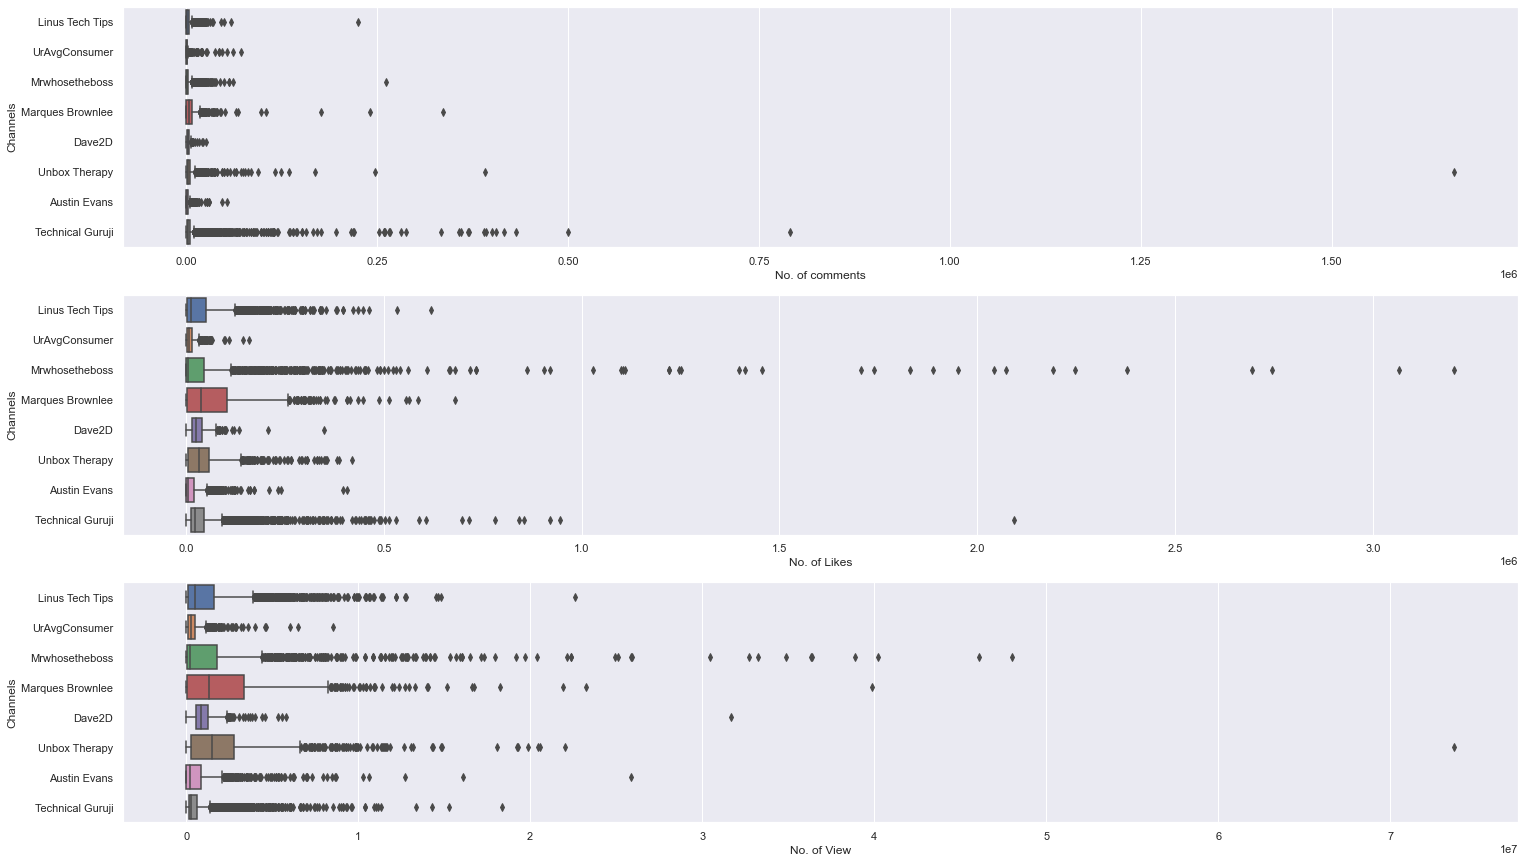

In [112]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=stats['Stats_Comment'], y=stats['Video_Channel_title'], ax=axes[0])
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_Like'], y=stats['Video_Channel_title'],    ax=axes[1])
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_view'], y=stats['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of View')
b.set_ylabel('Channels')
plt.show()

In [113]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index10.html","w")
Html_file.write(html_str)
Html_file.close()


We can observe a large number of outliers in data has range of our boxplot is very small has compared to the scale of measurement, But these outliers are natural outliers as these are not caused due to incorrect data or error in data collection. it tells us that there are videos who have extremely high or low video statistics compared to average video statistics for a particular channel. we can see 3 such outliers which have the maximum value on comments, likes and views plot for channel "Unbox Therapy", "Technical Guruji" and "Unbox Therapy" respectively as seen early in bar plots for maximum statistics for videos. 

As these are natural outliers we need to perform analysis with and without outliers to understand more, currently we while analyse the data by removing the outliers which will enable us to discover trends on data which is more commonly occuring and remove the statistics data related to videos having typically low chance of occuring.

#Handling outliers 

Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

In [39]:
stats.Stats_Comment.describe().apply(lambda x: format(x, '.2f'))

count      19986.00
mean        4276.77
std        19820.06
min            0.00
25%          480.00
50%         1603.00
75%         3919.50
max      1660778.00
Name: Stats_Comment, dtype: object

#Identifying outliers with the "1.5xIQR rule"

A commonly used rule says that a data point is an outlier if it is more than 1.5 x IQR, above the third quartile or below the first quartile.

* Low outliers --->  Q1 - 1.5 x IQR

* High outliers ---> Q3 + 1.5 x IQR

In [40]:
def BoxLimits(x): #get Data frame column as arguement
    Q1 = x.quantile(0.25) #Calculate first quartile
    Q3 = x.quantile(0.75) #Calculate third quartile
    IQR = Q3 - Q1 #Calculate inter quartile range
    L_limit = Q1 - (1.5 * IQR) #Using IQR calculate max and min limit of data
    U_limit = Q3 + (1.5 * IQR)
    u = max(x[x<U_limit]) #Get the max data point which is less than maximum limit
    l = min(x[x>L_limit]) #Get the min data point which is greater than lower limit of data
    return [u,l] #return max and min data point

Function remove() 

takes column name as attribute and returns a dataframe with all outliers removed for that particular column for all 8 channels. 

An iterative process ensures that masking is taken care and all outliers are removed.

In [41]:
def remove(col):
  outlier = [] #initialize variable outlier with empty list
  df = stats.copy() #make a copy of stats data frame in df
  flag = True #set flag to True
  while flag:

    for channels in stats['Video_Channel_title'].unique(): #Repeat for every youtube channel
      channel = df[df['Video_Channel_title'] == channels] #using logical indexing get subset of data for a particular channel
      u,l = BoxLimits(channel[col]) #pass the particular channel data to BoxLimits function for getting the upper and lower limits
      outlier.extend(channel[(channel[col] < l) | (channel[col] > u) ].index) #Extend the outlier list with all indices from all channel having outlier
    if len(outlier) > 0: #Check if length of outlier list is greater than 0
      df.drop(index = outlier, inplace = True) #Drop all indices having outliers
      outlier = [] #reset outlier variable
    else:
      flag = False #on zero outliers set looping flag to false
  return df #return Dataframe where all outliers are removed
  

#Handling comments outliers

In [42]:
comments = remove('Stats_Comment')

In [43]:
comments.shape

(17108, 5)

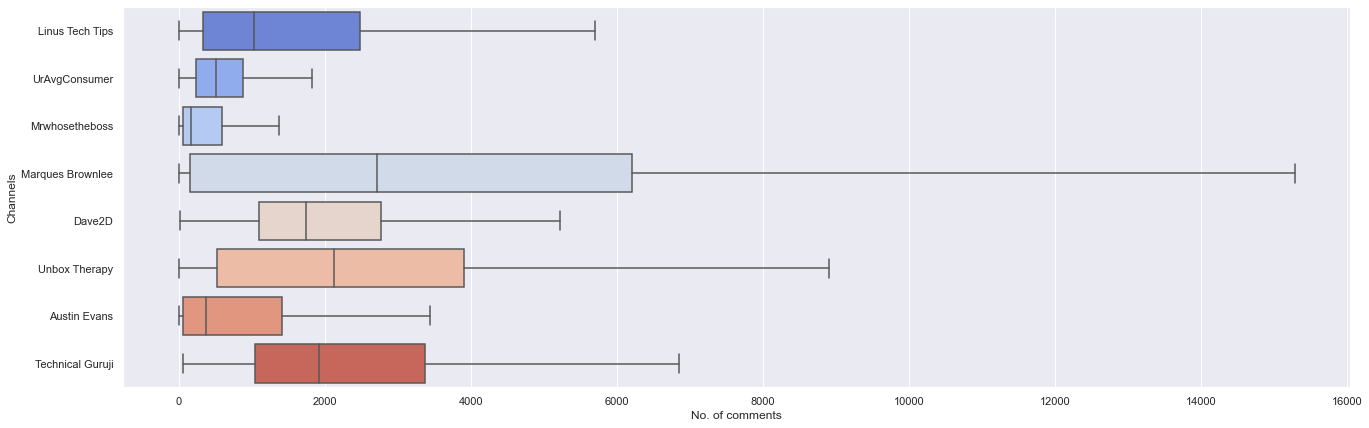

In [114]:
fig = plt.figure(figsize=(22, 7))

b = sns.boxplot(x=comments['Stats_Comment'], y=comments['Video_Channel_title'], palette='coolwarm')
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')

plt.show()

In [115]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index11.html","w")
Html_file.write(html_str)
Html_file.close()


After removing all the outliers we can see clean boxplot for comment data for each channel. 

1. We can see that despite "Unbox Therapy" having the highest commented video when we remove the outliers "Marques Brownlee" has the higest maximum limit of comments and a highed third quartile than "Unbox Therapy".

2. Mean comments for channel "Unbox Therapy", "Technical Guruji" and "Marquees Brownlee" are roughly same

#Handling Likes outliers 

In [45]:
Likes = remove('Stats_Like')

In [46]:
Likes.shape

(14008, 5)

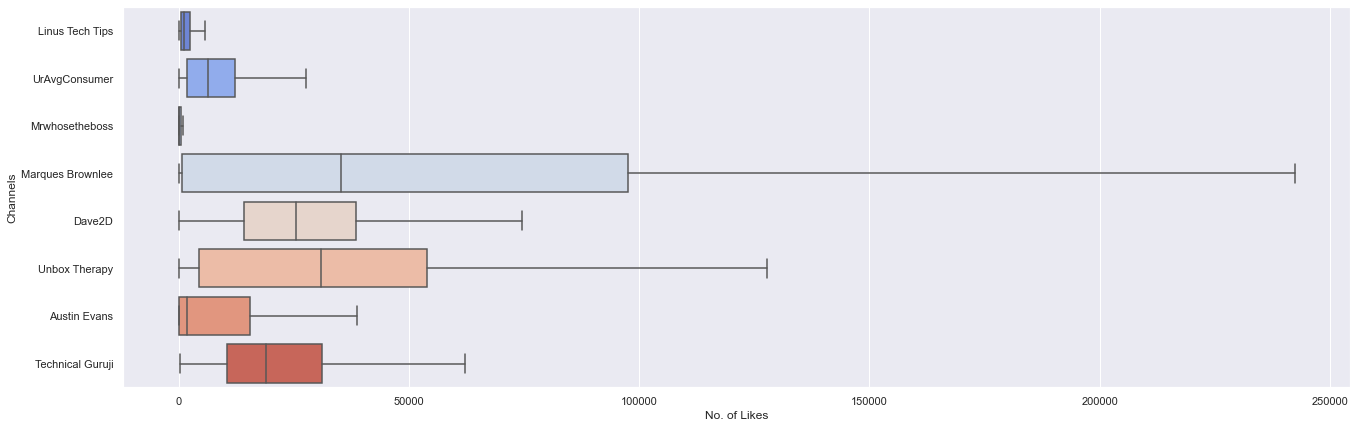

In [116]:
fig = plt.figure(figsize=(22, 7))

b = sns.boxplot(x=Likes['Stats_Like'], y=Likes['Video_Channel_title'], palette='coolwarm')
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')

plt.show()

In [117]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index12.html","w")
Html_file.write(html_str)
Html_file.close()


On Likes distribution we can understand that 
1. Channel "Marques Brownlee" has the highest 3rd quartile and maximum limit followed by "Unbox Therapy". 
2. Despite "Technical Guruji" having the most number of likes on a video the mean likes of video falls below at no. 4, even below channel "Dave2D" which has a higher maximum limit as well as third quartile. this indicates that having a high number of likes on a particular video does not indicate that viewers generally like all the videos of that channel. 

#Handling Views outliers

In [48]:
Views = remove('Stats_view')

In [49]:
Views.shape

(16955, 5)

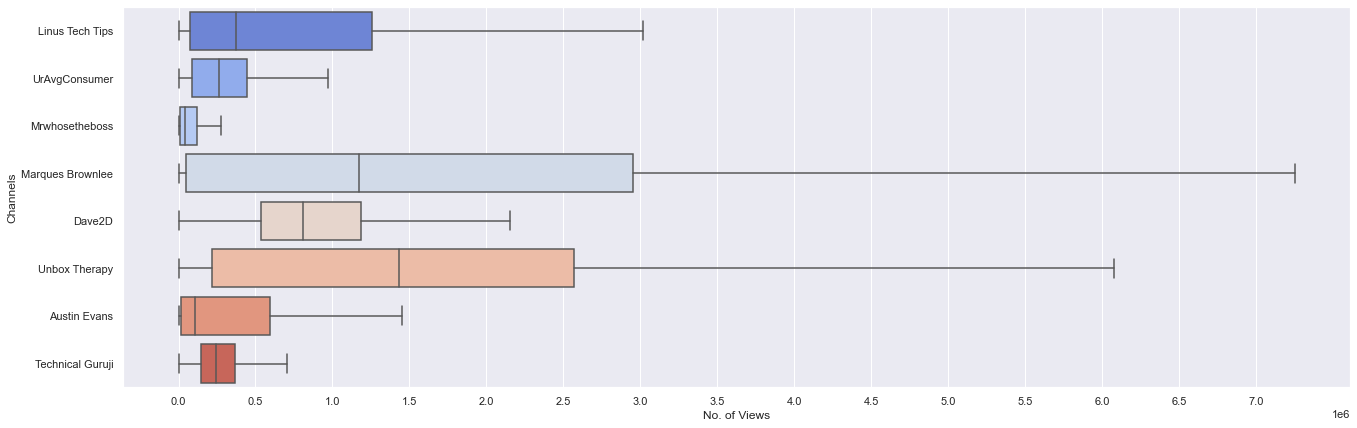

In [118]:
fig = plt.figure(figsize=(22, 7))

b = sns.boxplot(x=Views['Stats_view'], y=Views['Video_Channel_title'], palette='coolwarm')
step_value = 500000
b.set_xticks(np.arange(min(Views['Stats_view']), max(Views['Stats_view']), step_value))
b.set_xlabel('No. of Views')
b.set_ylabel('Channels')

plt.show()

In [119]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index13.html","w")
Html_file.write(html_str)
Html_file.close()


1. We can notice that after removing the outliers "Marques Brownlee" replaces "Unbox Therapy" for the mosted viewed channel.
2. "Linus Tech Tips" which was supposedly having the highest view count of all the channels, after cleaning even the maximum limit falls below the mean views of "Marques Brownlee" and "Unbox Therapy". this can be indicating of the fact that majority of the videos of channel "Linus Tech Tips" receives a very low viewing and its only the cumalative views of all the videos help channel to score the highest views of all. 
3. Interesting even though having the largest subscriber base of all the channels "Technical Guruji" channel performs the poorest in terms of views compared to all other channels in view of subcriber count, This tells us that subscriber count is not the sole deciding factor of views on a particular video and there might be other factors such as content, video length, trust etc to name a few. a more indepth analysis might help us find the exact relationship

#Comparsion of Average Comments, Likes & Views after removing outliers

In [120]:
group_comment = comments.groupby(by='Video_Channel_title').mean()
group_like = Likes.groupby(by='Video_Channel_title').mean()
group_view = Views.groupby(by='Video_Channel_title').mean()
group = stats.groupby(by='Video_Channel_title').mean()

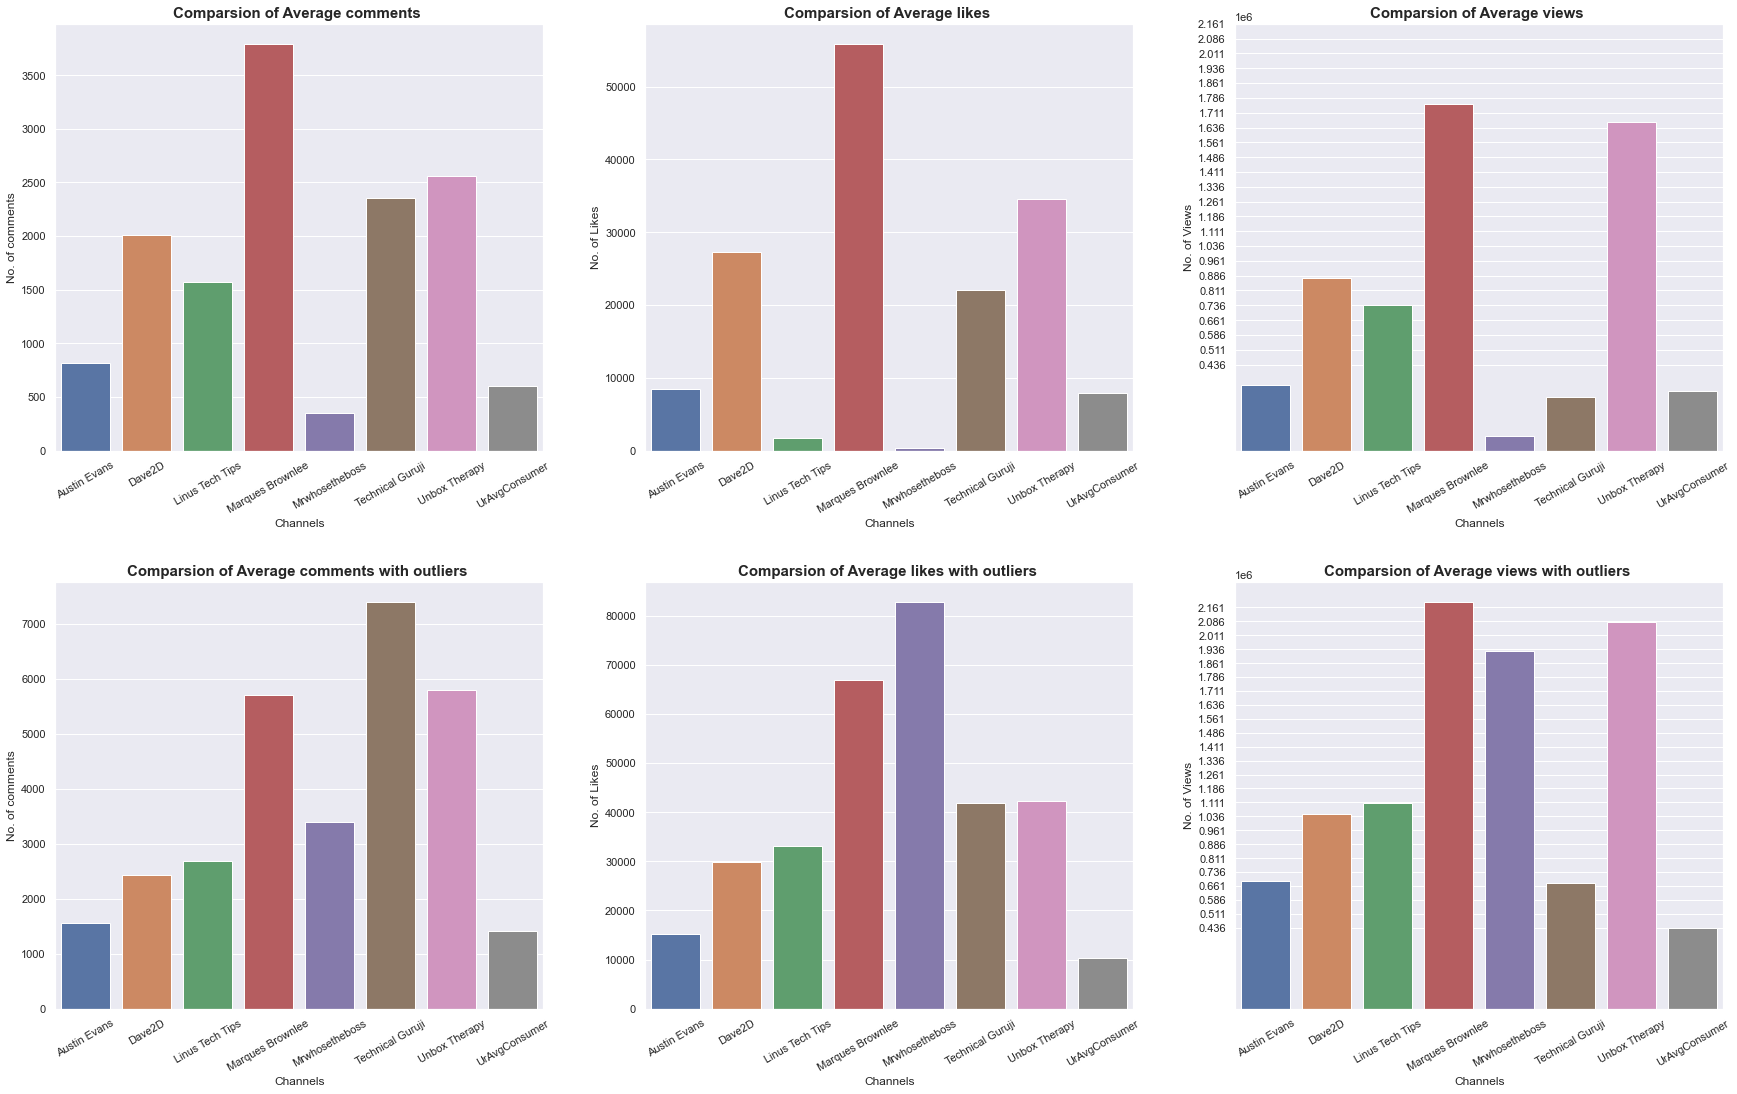

In [121]:
fig, axes = plt.subplots(2, 3, figsize=(25, 16))


b = sns.barplot(x= group_comment.index , y=group_comment['Stats_Comment'], ax=axes[0,0])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of comments')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average comments ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group_like.index , y=group_like['Stats_Like'], ax=axes[0,1])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Likes')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average likes ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group_view.index , y=group_view['Stats_view'], ax=axes[0,2])
step_value = 75000
b.set_yticks(np.arange(min(group['Stats_view']), max(group['Stats_view']), step_value))
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Views')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average views ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group.index , y=group['Stats_Comment'], ax=axes[1,0])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of comments')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average comments with outliers ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group.index , y=group['Stats_Like'], ax=axes[1,1])
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Likes')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average likes with outliers ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

b = sns.barplot(x= group.index , y=group['Stats_view'], ax=axes[1,2])
step_value = 75000
b.set_yticks(np.arange(min(group['Stats_view']), max(group['Stats_view']), step_value))
b.set_xticklabels(b.get_xticklabels(),rotation = 30)
b.set_ylabel('No. of Views')
b.set_xlabel('Channels')
b.set_title('Comparsion of Average views with outliers ', fontdict= { 'fontsize': 15, 'fontweight':'bold'})

fig.tight_layout(pad=3.0)
plt.show()

In [122]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index14.html","w")
Html_file.write(html_str)
Html_file.close()


#Inference
> ### Average Comments
1.   We can see that Channel "Technical Guruji" has the highest average comments and "Unbox Therapy" being second when compared with other channels with outliers. 
2.   While in 1st bar plot without outliers we can see that channel "Marques Browniee" has the highest average, Technical guruji falls at no. 3 and "Unbox Therapy" maintains its stats and position,  these in turn means that tech videos of channel "Marques Browniee" receives on a average more no. comments compared to other tech channels which might receive high comments on some particular videos but not all. 
3. So we can say that it indicates the audience comment engagement received on Tech Channel "Marques Browniee" is more

> ### Average Likes
1. Comparing both charts showing average number of likes with and without outliers we can immediately see that channels 'Austin Evans', 'Linus Tech Tips' and 'Mrwhosetheboss' falls down considerably in graph without outliers suggesting only few hundreds or thousands of likes turn on in average on their tech videos, which raises concerns about the viewers perception of videos and viewers interaction.
2. other channels like "Marques Browniee", "Unbox Therapy", "Technical Guruji" and "Dave2D" maintain the shape of the bar between the two graphs with "Marques Browniee" enjoying highest no. of likes with and without outlier showing a positive viewer attraction and could also suggest that viewers Trust the content created by channel "Marques Browniee"

> ### Average Views
1. Channel "Technical Guruji", "Linus Tech Tips" and "Mrwhosetheboss" slides down the graph significantly when we remove the outliers, while rest of the channel's standing stays the same. 
2. When it comes to average views on each video uploaded, "Unbox Therapy" receives the highest average views followed by "Marques Browniee"
3. Observing average views on channel "Dave2D" in comparsion to the number of subscriber count and total no. of videos uploaded its safe to consider that viewers ranking and attraction for channel is highly positive. which states a strong social presence.












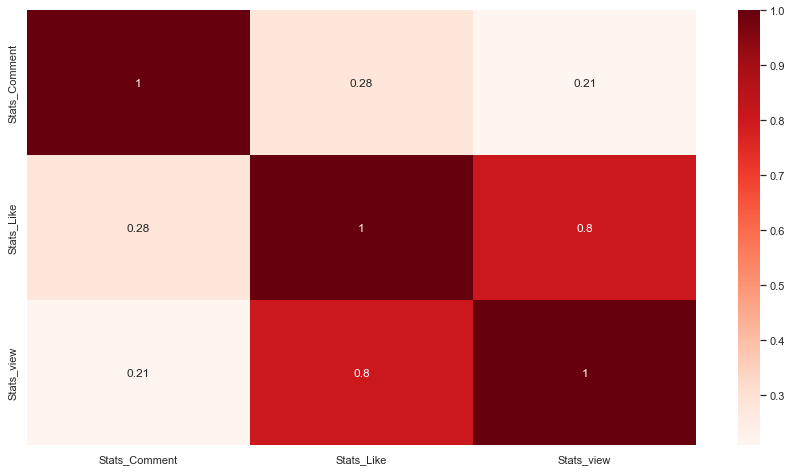

In [123]:
fig, ax = plt.subplots(figsize =(15, 8))
corr_matrix=stats.drop(columns='Stats_Fav').corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.show()

In [124]:
import mpld3
html_str = mpld3.fig_to_html(fig, template_type="simple")
Html_file= open("index15.html","w")
Html_file.write(html_str)
Html_file.close()


#Conclusion

1. Channel "Linus Tech Tips" is the **most Viewed** and the channel with **Highest video uploads**.
2. Channel "Technical Guruji" is the **most Subscribed** Channel.
3. There exist a **positive linear relationship** between channel subscriber count and view count, with channel "Linus Tech Tips" and "Technical Guruji" being outliers
4. *Channel View count is more correlated to Channel video upload* with 0.78 coefficient.
5. re-iterating the take away points from upload frequnecy analysis
  1.   "Technical Guruji" is the **highest uploading** channel with 700+ videos and no downfall since its start.
  2. "Marques Browniee" and "Linus Tech Tips" are the two channels maintaing a **flat curve cross the years** with average uploads of 100 and 450 videos respectively.
  3. "Dave2D", "MrWhostheBoss" and "Austin Evans" are 3 channels showing a **decline in upload frequency**.
  4. "Unbox Therapy" shows **positive growth in channel but with fluctuations**.

6. * Highest comments on a video - "Unbox Therapy" Video Id - "PndXdtKnHmE"
    https://www.youtube.com/watch?v=PndXdtKnHmE&ab_channel=UnboxTherapy
   * Highest Views on a video - "Unbox Therapy" Video Id - "znK652H6yQM"
   https://www.youtube.com/watch?v=znK652H6yQM&ab_channel=UnboxTherapy
   * Highest Likes on a video - "Technical Guruji" Video Id - "AkuRDBX92LA"
   https://www.youtube.com/watch?v=AkuRDBX92LA&ab_channel=TechnicalGuruji

7. "Marques Brownlee" has the *higest maximum limit of comments after removing the natural outliers*, also Mean comments for channel "Unbox Therapy", "Technical Guruji" and "Marquees Brownlee" are roughly same.

8. *Having a high number of likes on a particular video does not indicate that viewers generally like all the videos of that channel*.as Technical Guruji" having the most number of likes on a video the mean and maximum likes of video falls below at no. 4. 

9. Majority of the videos of channel "Linus Tech Tips" *receives a very low viewing* and its only the cumalative views of all the videos which help channel to score the highest views of all. due to the maximum limit falls below the mean views of "Marques Brownlee" and "Unbox Therapy". 

10. *"Technical Guruji" channel performs the poorest in terms of views compared to all other channels in view of subcriber count*, This tells us that subscriber count is not the sole deciding factor of views on a particular video and there might be other factors such as content, video length, trust etc to name a few. a more indepth analysis might help us find the exact relationship

11. Refer inference from comparison of average statistics of before and after removing outliers. 








